In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

# Import Data:

In [11]:
store_df = pd.read_csv("D:\\Data\\Machine Learning\\Cohort Analysis\\SuperStoreSales_Whole.csv")

In [ ]:
# pro5 = ProfileReport(store_df, title="SuperStoreSales_Whole Report")
# pro5.to_file("SuperStoreSales_Whole Report.html")
# store_df.info()

# Cleaning:

In [12]:
store_df['Order Date'] = pd.to_datetime(store_df['Order Date'])
store_df['Year'] = store_df['Order Date'].dt.year
year_select = 2018
store_df = store_df.loc[store_df['Year'] == year_select]

# Filter Col:

In [13]:
customer_df = store_df[['Order ID','Order Date','Customer ID','Sales']]
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258 entries, 12 to 9790
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     3258 non-null   object        
 1   Order Date   3258 non-null   datetime64[ns]
 2   Customer ID  3258 non-null   object        
 3   Sales        3258 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 127.3+ KB


In [14]:
def getMonthYearOrder(x):
    return dt.datetime(x.year, x.month, 1)

customer_df['Order Month'] = customer_df['Order Date'].apply(getMonthYearOrder)

customer_df['Cohort Month'] = customer_df.groupby('Customer ID')['Order Month'].transform('min')

def getMonth(column):
    return customer_df[column].dt.month

OrderMonth = getMonth('Order Month')
CohortMonth = getMonth('Cohort Month')

month_diff = OrderMonth - CohortMonth
customer_df['CohortIndex'] = month_diff + 1

In [15]:
cohort_df = customer_df.groupby(['Cohort Month', 'Order Month','CohortIndex'])['Customer ID'].nunique().reset_index()
def convert_datetostr(df,col):
    return df[col].dt.strftime('%Y-%m-%d')
cohort_df['Cohort Month'] = convert_datetostr(cohort_df, 'Cohort Month')
cohort_df['Order Month'] = convert_datetostr(cohort_df, 'Order Month')
cohort_table = cohort_df.pivot(index='Cohort Month', columns=['CohortIndex'], values='Customer ID')

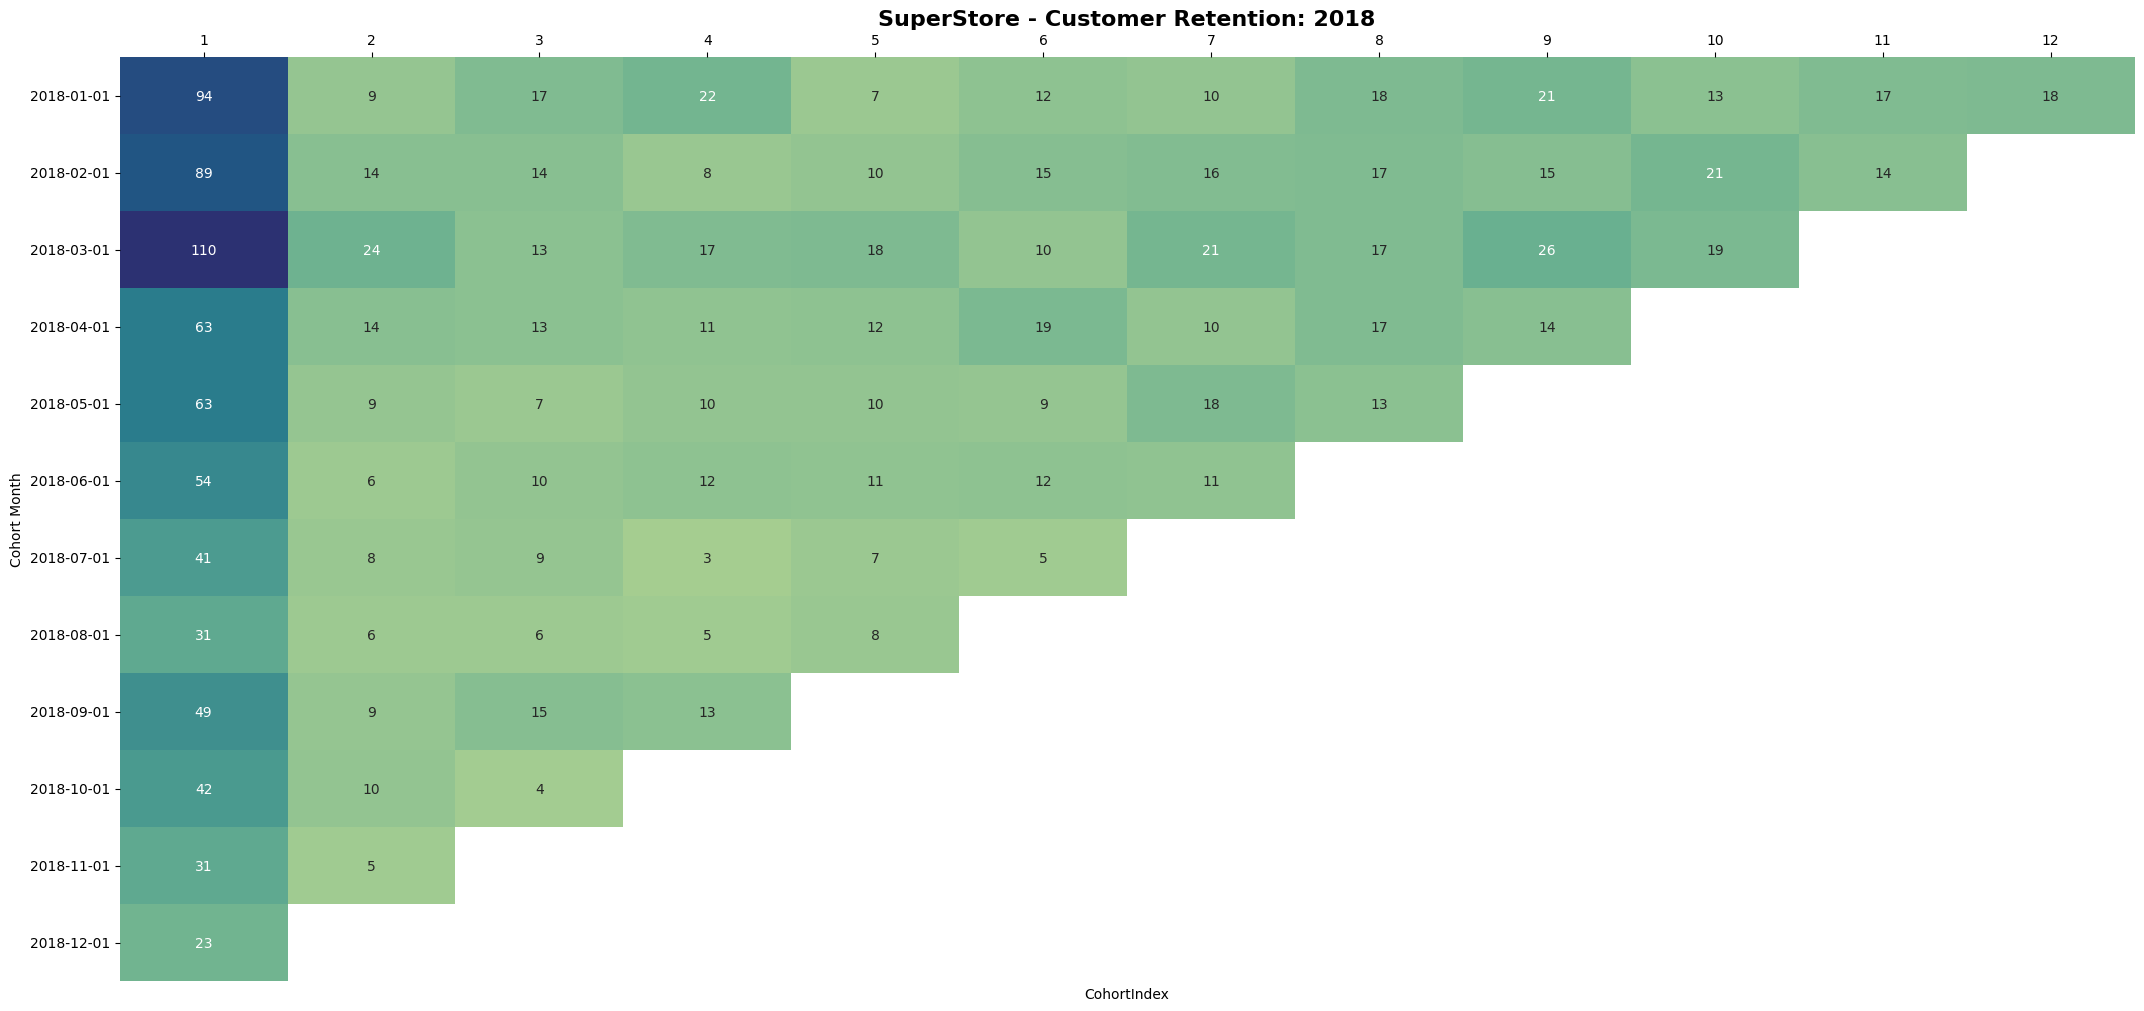

In [16]:
def plot_heatmap(data, annot, color, format_values):
    plt.figure(figsize=(26,12))
    plt.title('SuperStore - Customer Retention: {}'.format(year_select),fontsize=16, fontweight='bold')
    ax = sns.heatmap(data, annot=annot, cmap=color, cbar=False, fmt=format_values)
    ax.xaxis.tick_top()

plot_heatmap(cohort_table, True, 'crest', ".0f")